In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score,classification_report
import optuna
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import missingno as msno
from optuna.samplers import TPESampler

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
class CFG:
    """
    Class'ın amacı:
    - Feature engineering aşamasını aç-kapa formatına dönüştürerek bug azaltmak
    """

    target = 'Outcome'
    df_path= "diabetes.csv"


    #Hangi featureların kullanılacağına karar verme
    
    use_pregnancy_category = True
    use_age_group = True
    use_blood_pressure_category = True
    use_glucose_category = True
    use_bmi_category = True
    use_age_bmi = True
    use_age_glucose = True
    use_pregnancies_glucose = True
    use_bmi_diabetes_pedigree_function = True
    use_triceps_skin_fold_indicator = True
    use_insulin_resistance_index = True
    use_glucose_insulin_resistance_interaction = True
    use_insulin_sensitivity = True
    use_pregnancies_age_interaction = True
    use_pregnancies_blood_pressure_interaction = True
    use_insulin_diabetes_pedigree_interaction = True
    use_bmi_glucose_interaction = True
    use_age_blood_pressure_interaction = True
    use_insulin_sensitivity_insulin_interaction = True
    use_age_triceps_skin_fold_interaction = True
    use_bmi_blood_pressure_interaction = True
    use_pregnancy_category_triceps_skin_fold_interaction = True
    use_insulin_age_interaction = True
    use_glucose_category_bmi_interaction = True
    use_insulin_sensitivity_age_interaction = True
    use_age_diabetes_pedigree_interaction = True
    use_pregnancy_category_insulin_interaction = True
    use_bmi_insulin_resistance_index_interaction = True
    use_age_group_blood_pressure_category_interaction = True
    use_glucose_triceps_skin_fold_interaction = True
    use_pregnancy_category_bmi_interaction = True
    use_bmi_insulin_sensitivity_interaction = True
    use_insulin_blood_pressure_interaction = True
    use_bmi_age_group_interaction = True
    use_pregnancy_category_age_interaction = True 




In [3]:
""" Features removed: ['PregnancyCategory', 'BloodPressure_Category', 'Pregnancies_Age_Interaction', 'Pregnancies_BloodPressure_Interaction', 'PregnancyCategory_Triceps_Skin_Fold_Interaction', 'GlucoseCategory_BMI_Interaction', 'Age_DiabetesPedigree_Interaction', 'PregnancyCategory_Insulin_Interaction', 'BMI_InsulinResistanceIndex_Interaction', 'PregnancyCategory_Age_Interaction'] """

" Features removed: ['PregnancyCategory', 'BloodPressure_Category', 'Pregnancies_Age_Interaction', 'Pregnancies_BloodPressure_Interaction', 'PregnancyCategory_Triceps_Skin_Fold_Interaction', 'GlucoseCategory_BMI_Interaction', 'Age_DiabetesPedigree_Interaction', 'PregnancyCategory_Insulin_Interaction', 'BMI_InsulinResistanceIndex_Interaction', 'PregnancyCategory_Age_Interaction'] "

In [4]:
df = pd.read_csv(CFG.df_path)


Analyze Data

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000

In [8]:
def analyze_columns(df):
    """
    Veri çerçevesindeki değişkenlerin türlerini ve eksik değerlerini analiz eder.

    Args:
        df (DataFrame): Analiz edilecek veri çerçevesi.

    Returns:
        dict: Değişken türlerini ve eksik değerleri içeren bir sözlük.
    """
    # Kategorik sütunlar
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Numerik sütunlar
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Tarih sütunlar
    datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()

    # Boolean sütunlar
    bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
    
    # Numerik görünen kategorik sütunlar
    numeric_but_categorical = [col for col in numeric_cols if df[col].nunique() < 10]
    
    # Kategorik görünen kardinal sütunlar
    cardinal_categoricals = [col for col in categorical_cols if df[col].nunique() > 30]

    # Eksik değer içeren sütunlar
    nan_cols = [col for col in df.columns if df[col].isna().any()]

    # Eksik değer içeren sütunların hangi gruplarda olduğu bilgisi
    col_analysis = {
        "categorical_cols": categorical_cols,
        "numeric_cols": numeric_cols,
        "datetime_cols": datetime_cols,
        "bool_cols": bool_cols,
        "numeric_but_categorical": numeric_but_categorical,
        "cardinal_categoricals": cardinal_categoricals
    }
    nan_cols_groups = {col: next(group for group, cols in col_analysis.items() if col in cols) for col in nan_cols}

    # Gözlem sayısı
    Observations = df.shape[0]

    # Değişken sayısı
    Variables = df.shape[1]

    print ({
        "Observations": Observations,
        "Variables": Variables,
        "Categorical Columns": categorical_cols,
        "Numerical Columns": numeric_cols,
        "Datetime Columns": datetime_cols,
        "Boolean Columns": bool_cols,
        "Numerical but Categorical Columns": numeric_but_categorical,
        "Cardinal Categorical Columns": cardinal_categoricals,
        "Columns With NaN Values": nan_cols,
        "Variable Types of Columns with Nan Values": nan_cols_groups
    })

    return categorical_cols, numeric_cols, cardinal_categoricals, numeric_but_categorical


In [9]:
categorical_cols, numeric_cols, cardinal_categoricals, numeric_but_categorical = analyze_columns(df)

{'Observations': 768, 'Variables': 9, 'Categorical Columns': [], 'Numerical Columns': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], 'Datetime Columns': [], 'Boolean Columns': [], 'Numerical but Categorical Columns': ['Outcome'], 'Cardinal Categorical Columns': [], 'Columns With NaN Values': [], 'Variable Types of Columns with Nan Values': {}}


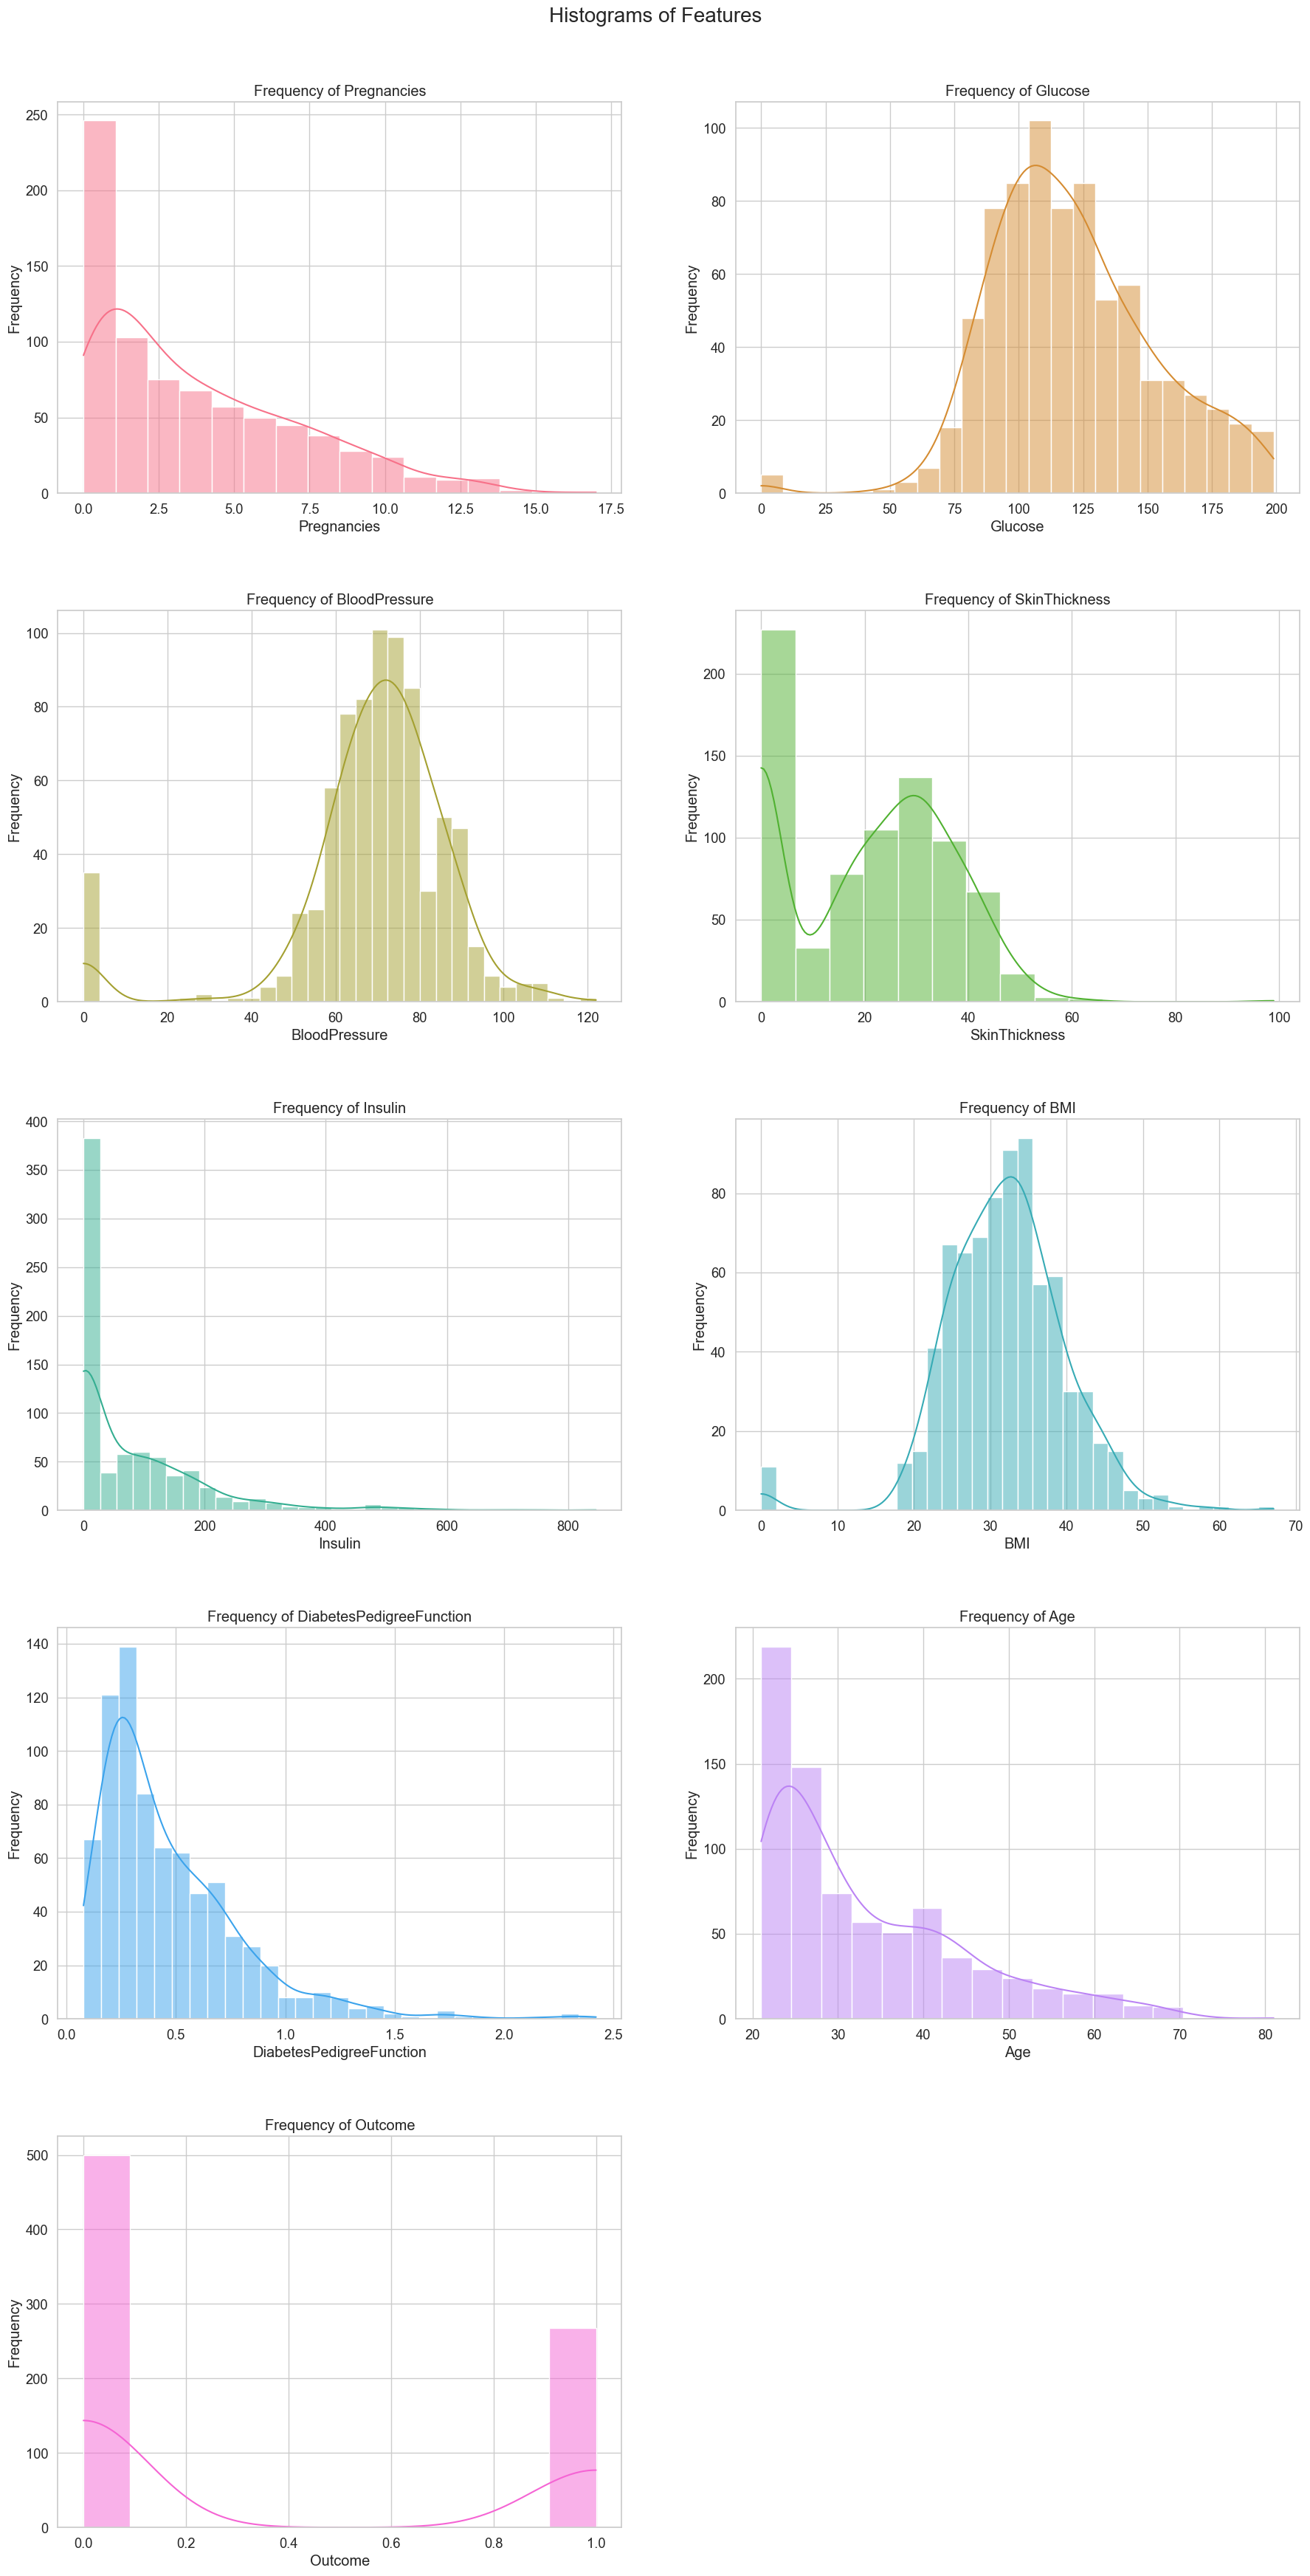

In [10]:
def histogram_of_features(df):
    """
    Verilen veri çerçevesindeki sütunların histogramlarını çizer.

    Argümanlar:
    df (pandas.DataFrame): Histogramları çizilecek veri çerçevesi.
    """
    # Seaborn stil ayarları
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("whitegrid")

    plt.figure(figsize=(18, 36))

    # Grid yapısını belirleme
    cols = len(df.columns)
    col_rows = (cols + 1) // 2

    # Renk paletini belirleme
    palette = sns.color_palette("husl", cols)

    for i, column in enumerate(df.columns):
        plt.subplot(col_rows, 2, i + 1)
        sns.histplot(df[column], kde=True, color=palette[i])
        plt.title(f"Frequency of " + f'{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    # Genel başlık ekleme
    plt.suptitle("Histograms of Features", y=0.97, fontsize=20)

    # Layout'u sıkıştırma ve plotları gösterme
    plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=4, w_pad=4) 
    plt.show()


histogram_of_features(df)

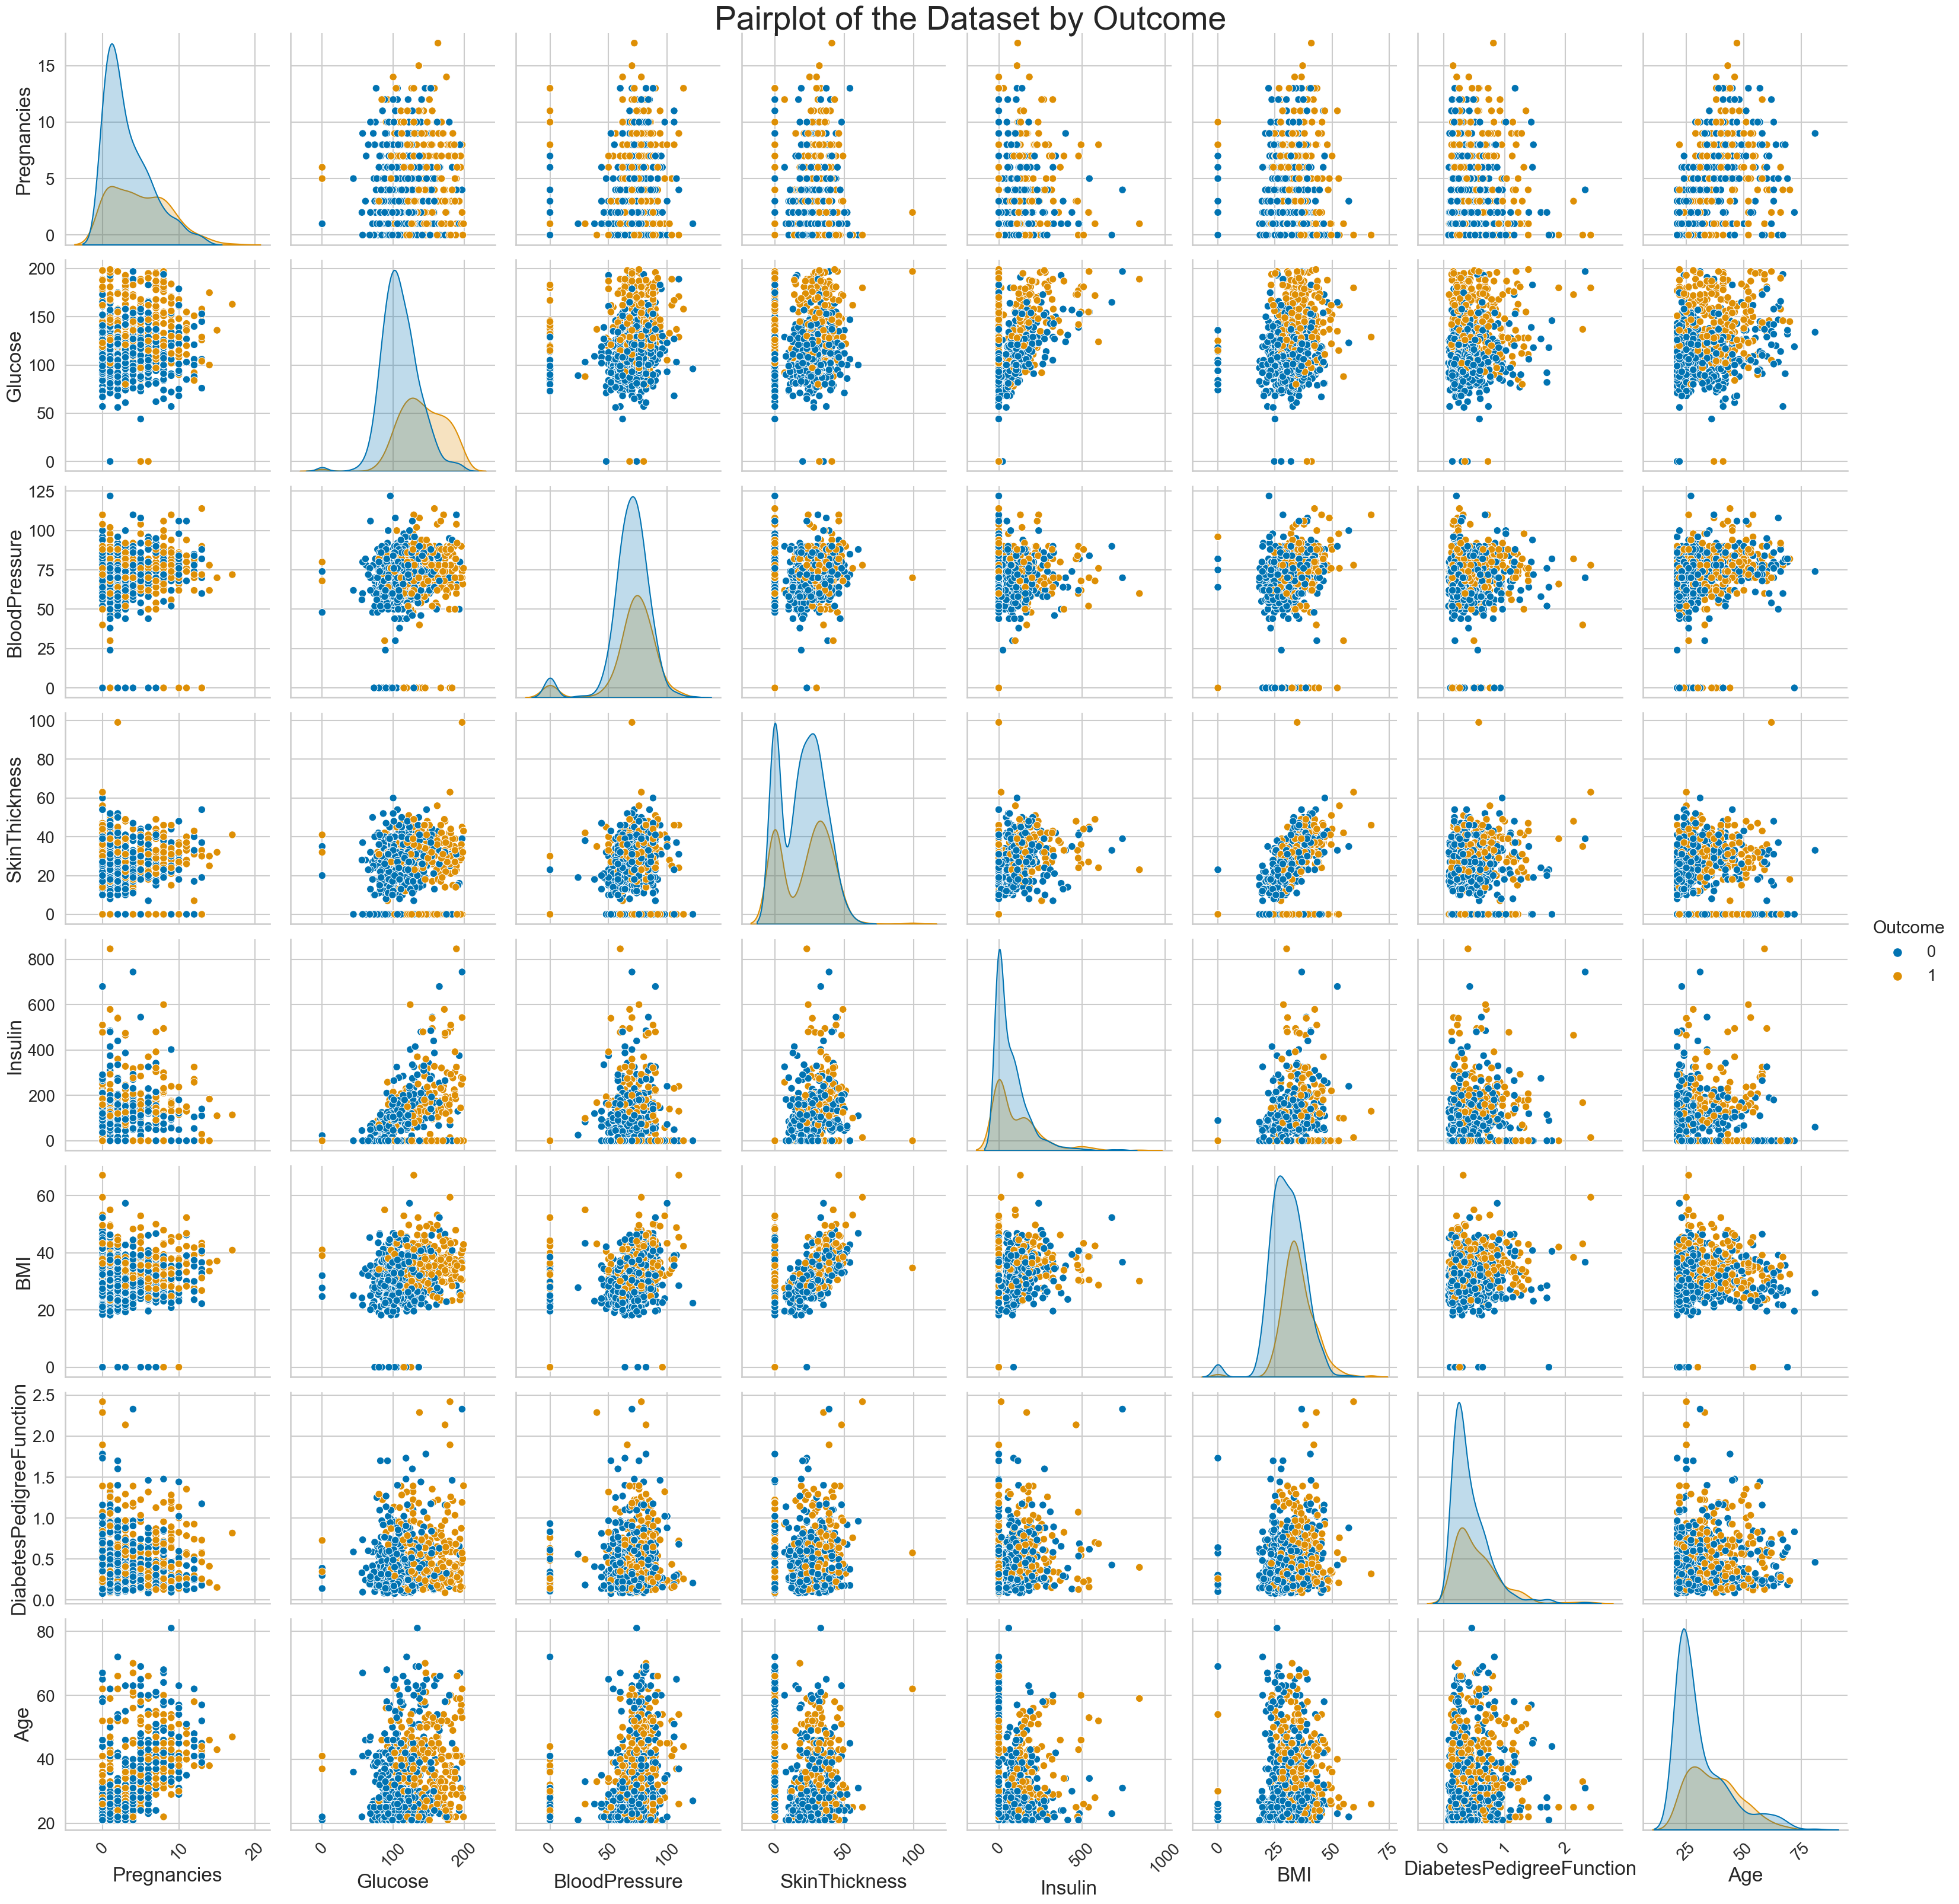

In [11]:
def pair_plots_of_features(df, target):
    """
    Verilen veri çerçevesindeki özelliklerin, hedef değişken ile aralarındaki ilişkileri gösteren pairplot'u çizer.

    Argümanlar:
    df (pandas.DataFrame): Pairplot'un çizileceği veri çerçevesi.
    target (str): Hedef değişkenin adı.
    """
    # Seaborn ve Matplotlib ayarları
    sns.set_context("talk", font_scale=1.2)
    sns.set_style("whitegrid")

    # Renk paleti oluşturma
    custom_palette = sns.color_palette("colorblind")

    # Pairplot'u oluşturma
    graphs = sns.pairplot(df, hue=target, palette=custom_palette, height=4, diag_kind='kde')

    # Başlık ekleme
    plt.suptitle(f"Pairplot of the Dataset by {target}", y=1, fontsize=40)

    # Eksen etiketlerini manuel olarak ayarlama
    for ax in graphs.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=24)
        ax.set_ylabel(ax.get_ylabel(), fontsize=24)
        ax.tick_params(axis='x', labelrotation=45)  # x ekseni etiketlerini döndürme

    # Plotları gösterme
    plt.show()

pair_plots_of_features(df, target="Outcome")


In [12]:
def analyze_target_feature(df, target):
    """
    Kategorik değişkenlere göre hedef değişkenin ortalaması ve
    hedef değişkene göre numerik değişkenlerin ortalamasını analiz eder.

    Args:
        df (DataFrame): Analiz edilecek veri çerçevesi.
        target (str): Hedef değişkenin adı.
    """
    # Kategorik değişkenlere göre hedef değişkenin ortalaması
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    print("Kategorik Değişkenlere Göre Hedef Değişkenin Ortalaması:")
    for col in categorical_cols:
        print(f"\nKategorik değişken: {col}")
        print(df.groupby(col)[target].mean())

    # Hedef değişkene göre numerik değişkenlerin ortalaması
    numeric_cols = df.select_dtypes(include=['number']).columns
    print("\nHedef Değişkene Göre Numerik Değişkenlerin Ortalaması:")
    for col in numeric_cols:
        if col != target:
            print(f"\nNumerik değişken: {col}")
            print(df.groupby(target)[col].mean())


In [13]:
analyze_target_feature(df,"Outcome")

Kategorik Değişkenlere Göre Hedef Değişkenin Ortalaması:

Hedef Değişkene Göre Numerik Değişkenlerin Ortalaması:

Numerik değişken: Pregnancies
Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

Numerik değişken: Glucose
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

Numerik değişken: BloodPressure
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

Numerik değişken: SkinThickness
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

Numerik değişken: Insulin
Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

Numerik değişken: BMI
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

Numerik değişken: DiabetesPedigreeFunction
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

Numerik değişken: Age
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


In [14]:
def detect_outliers_all_columns(df, threshold=1.5):
    """
    Verilen DataFrame üzerindeki tüm numerik sütunlardaki outlier'ları tespit eden fonksiyon.
    
    Parametreler:
    df (DataFrame): Outlier'ları tespit etmek istediğiniz veri çerçevesi.
    threshold (float): IQR eşik değeri. Varsayılan olarak 1.5 kullanılır.
    
    Döndürülenler:
    dict: Sütun adları ve outlier sayıları dictionary'si.
    """
    outlier_dict = {}
    
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.05)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        num_outliers = len(outlier_indices)
        
        outlier_dict[column] = num_outliers
    
    return outlier_dict

In [15]:
detect_outliers_all_columns(df)

{'Pregnancies': 0,
 'Glucose': 0,
 'BloodPressure': 0,
 'SkinThickness': 0,
 'Insulin': 2,
 'BMI': 0,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 0}

In [16]:
def handle_outliers(df, method='mask', lower_quantile=0.05, upper_quantile=0.95, threshold=1.5, cap_value=None):
    """
    Aykırı değerleri işler ve maskelenmiş veya sınırlı yöntemleri kullanır.
    
    Args:
        df (DataFrame): Veri çerçevesi.
        method (str): Aykırı değer işleme yöntemi ('remove', 'fill_mean', 'fill_median', 'mask', 'cap', 'leave_as_is').
        lower_quantile (float): Alt quantile değeri. Varsayılan değer 0.25.
        upper_quantile (float): Üst quantile değeri. Varsayılan değer 0.75.
        threshold (float): IQR çarpanı. Varsayılan değer 1.5.
        cap_value (float or None): Sınırlı yöntemde kullanılacak sabit değer. Varsayılan olarak None (kullanılmayacak).
    
    Returns:
        DataFrame: Aykırı değerler işlenmiş veri çerçevesi.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(lower_quantile)
        Q3 = df[col].quantile(upper_quantile)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        
        print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

        if method == 'remove':
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        elif method == 'fill_mean':
            mean_value = df[col].mean()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean_value, df[col])
        elif method == 'fill_median':
            median_value = df[col].median()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])
        elif method == 'mask':
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        elif method == 'cap':
            if cap_value is None:
                raise ValueError("Sınırlı yöntem için bir sabit değer belirtmelisiniz (cap_value).")
            df[col] = np.where(df[col] < lower_bound, cap_value, df[col])
            df[col] = np.where(df[col] > upper_bound, cap_value, df[col])
        elif method == 'leave_as_is':
            continue
        else:
            raise ValueError("Geçersiz aykırı değer işleme yöntemi seçildi.")

    return df


In [17]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000

In [18]:
handle_outliers(df)

Pregnancies - Lower Bound: -15.0, Upper Bound: 25.0
Glucose - Lower Bound: -74.0, Upper Bound: 334.0
BloodPressure - Lower Bound: -38.249999999999986, Upper Bound: 166.95
SkinThickness - Lower Bound: -66.0, Upper Bound: 110.0
Insulin - Lower Bound: -439.5, Upper Bound: 732.5
BMI - Lower Bound: -12.09249999999999, Upper Bound: 78.2875
DiabetesPedigreeFunction - Lower Bound: -1.3483999999999996, Upper Bound: 2.621599999999999
Age - Lower Bound: -34.5, Upper Bound: 113.5
Outcome - Lower Bound: -1.5, Upper Bound: 2.5


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
0            6.0    148.0           72.0           35.0      0.0  33.6                     0.627  50.0      1.0
1            1.0     85.0           66.0           29.0      0.0  26.6                     0.351  31.0      0.0
2            8.0    183.0           64.0            0.0      0.0  23.3                     0.672  32.0      1.0
3            1.0     89.0           66.0           23.0     94.0  28.1                     0.167  21.0      0.0
4            0.0    137.0           40.0           35.0    168.0  43.1                     2.288  33.0      1.0
..           ...      ...            ...            ...      ...   ...                       ...   ...      ...
763         10.0    101.0           76.0           48.0    180.0  32.9                     0.171  63.0      0.0
764          2.0    122.0           70.0           27.0      0.0  36.8                     0.340  27.0      0.0
765          5.0    121.0           72.0           23.0    112.0  26.2                     0.245  30.0      0.0
766          1.0    126.0           60.0            0.0      0.0  30.1                     0.349  47.0      1.0
767          1.0     93.0           70.0           31.0      0.0  30.4                     0.315  23.0      0.0

[768 rows x 9 columns]

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.636719   31.992578                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807      15.952218  114.242903    7.884160                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  732.500000   67.100000                  2.420000   81.000000    1.000000

In [20]:
# "0" olamayacak değerleri "Nan" değerler olarak atama
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
def median_target(col):   
    temp = df[df[col].notnull()]
    temp = temp[[col, 'Outcome']].groupby(['Outcome'])[[col]].median().reset_index()
    return temp

In [22]:
median_target('Insulin')

Outcome  Insulin
0      0.0    102.5
1      1.0    169.5

In [23]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [24]:
median_target('Glucose')

Outcome  Glucose
0      0.0    107.0
1      1.0    140.0

In [25]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [26]:
median_target('SkinThickness')

Outcome  SkinThickness
0      0.0           27.0
1      1.0           32.0

In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [28]:
median_target('BloodPressure')

Outcome  BloodPressure
0      0.0           70.0
1      1.0           74.5

In [29]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [30]:
median_target('BMI')

Outcome   BMI
0      0.0  30.1
1      1.0  34.3

In [31]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

### Histogram of Features After Change "0" Values with Median


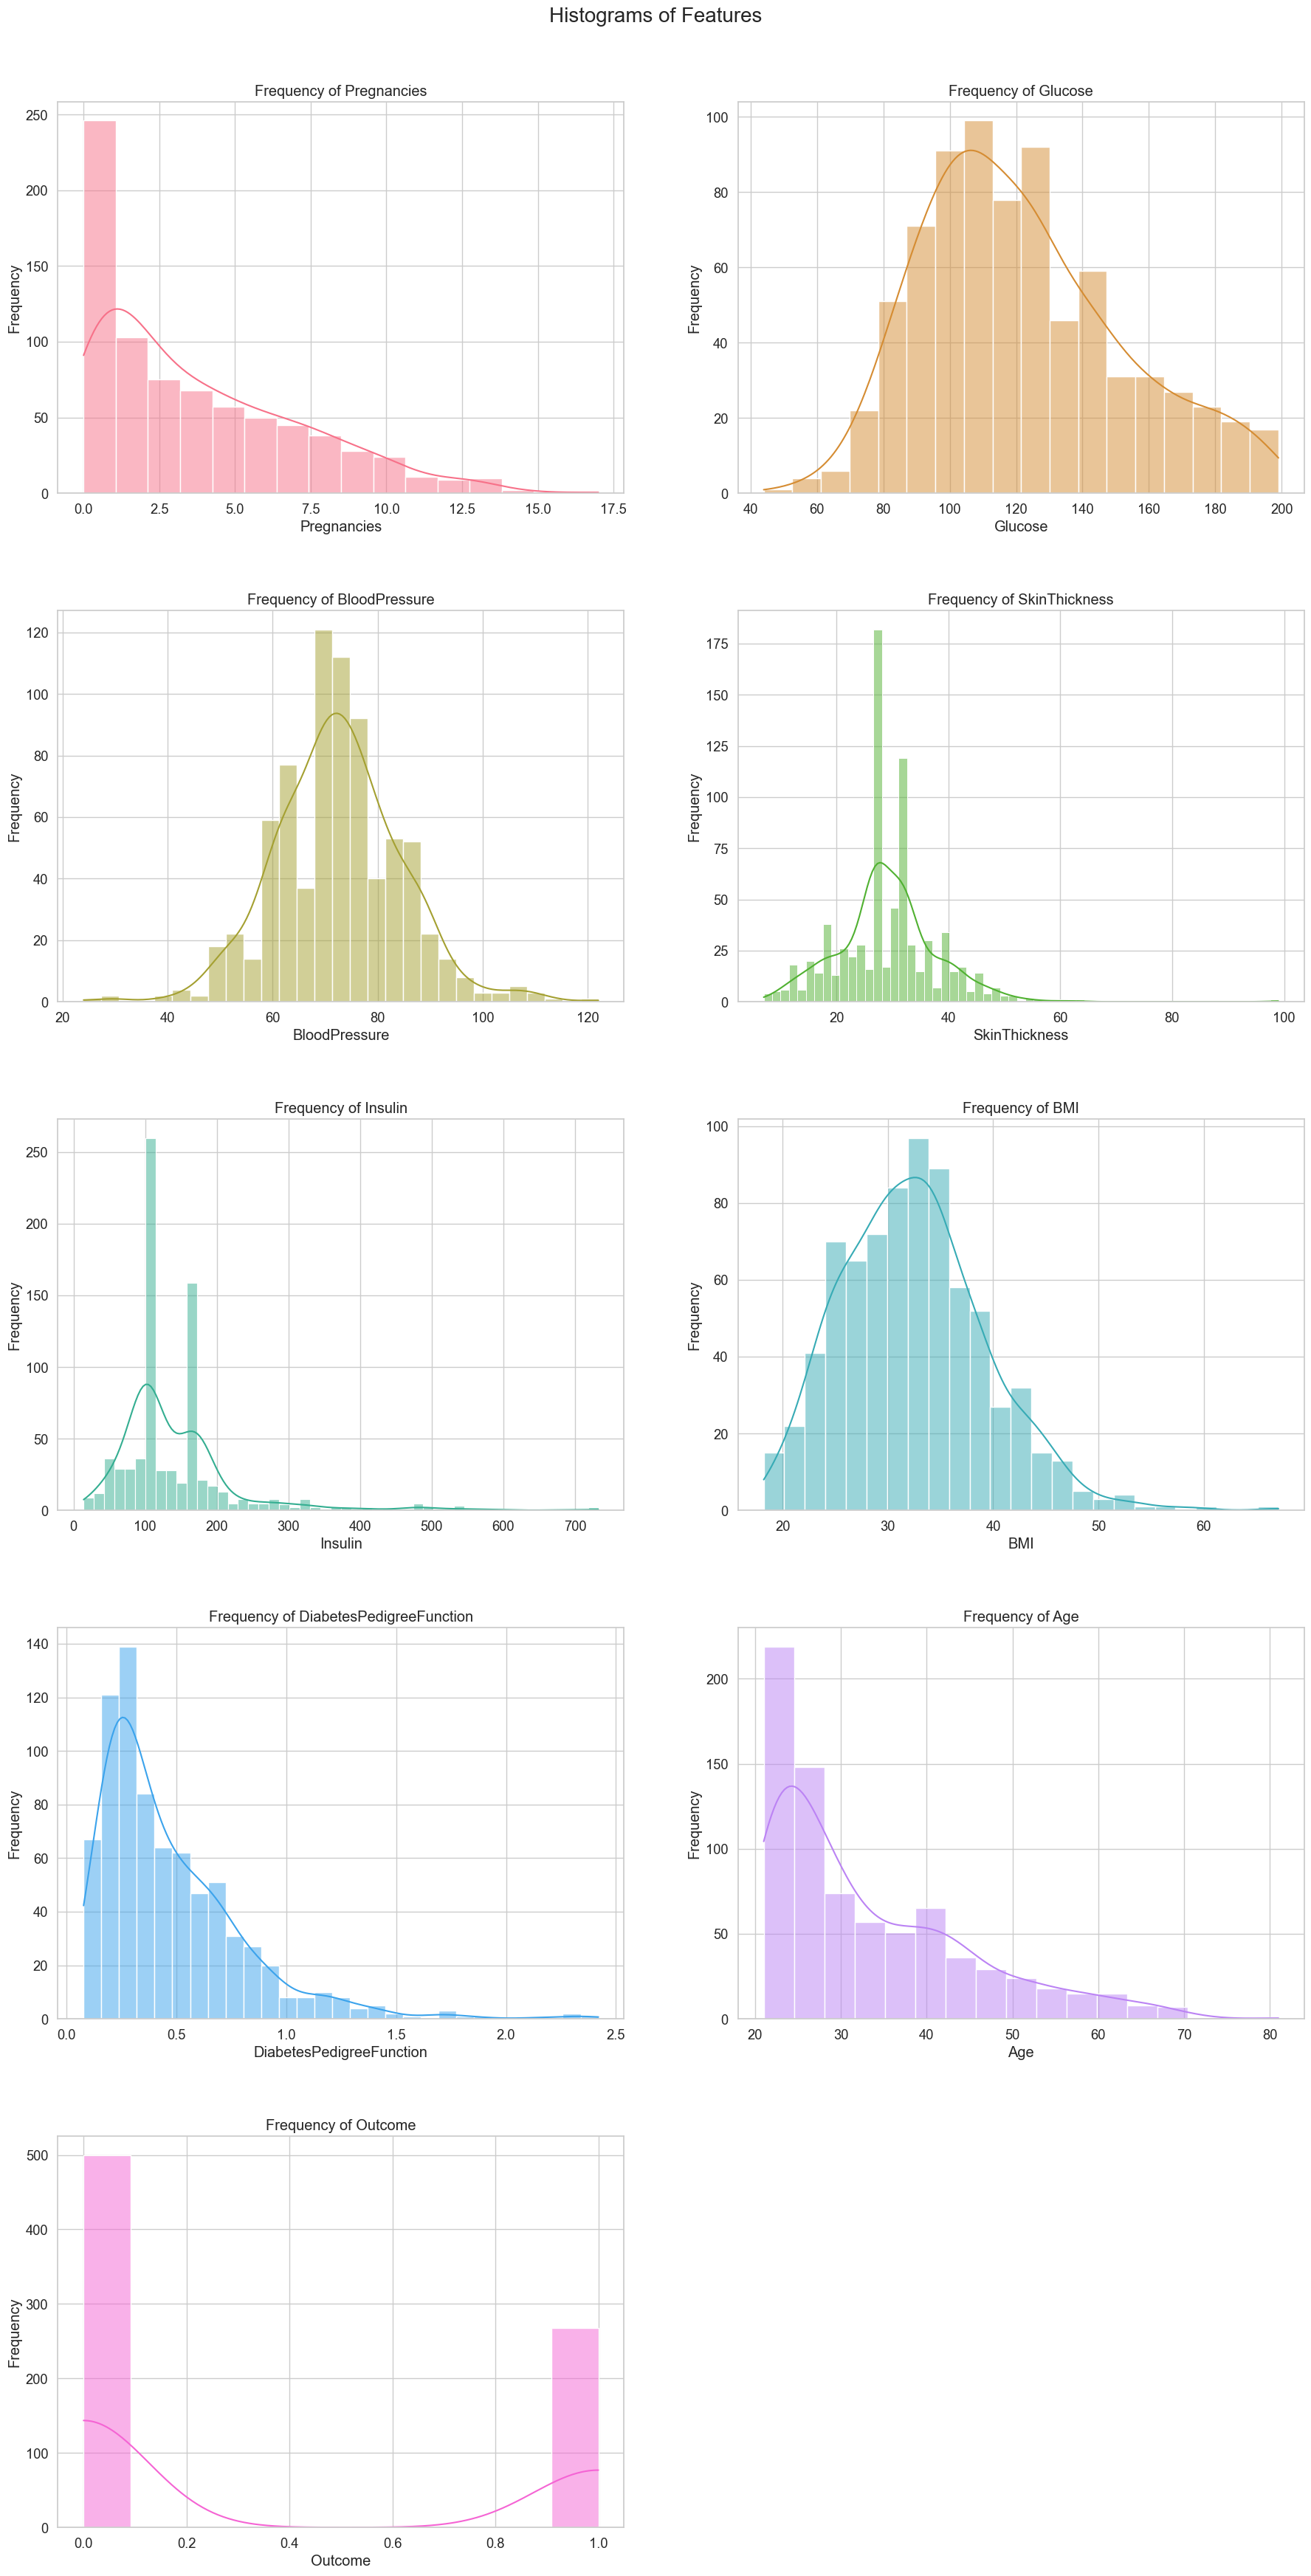

In [32]:
histogram_of_features(df)

In [33]:
def plot_correlation_heatmap(df, mask_upper_triangle=True, figsize=(15, 13), cmap='RdBu', vmin=-1, vmax=1):
    """
    Plot correlation heatmap for the given DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - mask_upper_triangle: Whether to mask the upper triangle of the heatmap (default=True).
    - figsize: Size of the matplotlib figure (default=(15, 13)).
    - cmap: Colormap to use (default='RdBu').
    - vmin: Minimum value for colormap normalization (default=-1).
    - vmax: Maximum value for colormap normalization (default=1).

    Returns:
    - None (displays the plot).
    """
    sns.style="white"

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    if mask_upper_triangle:
        mask = np.zeros_like(corr, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    else:
        mask = None

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2g')

    plt.title('Correlation Heatmap', fontsize=18)
    plt.show()

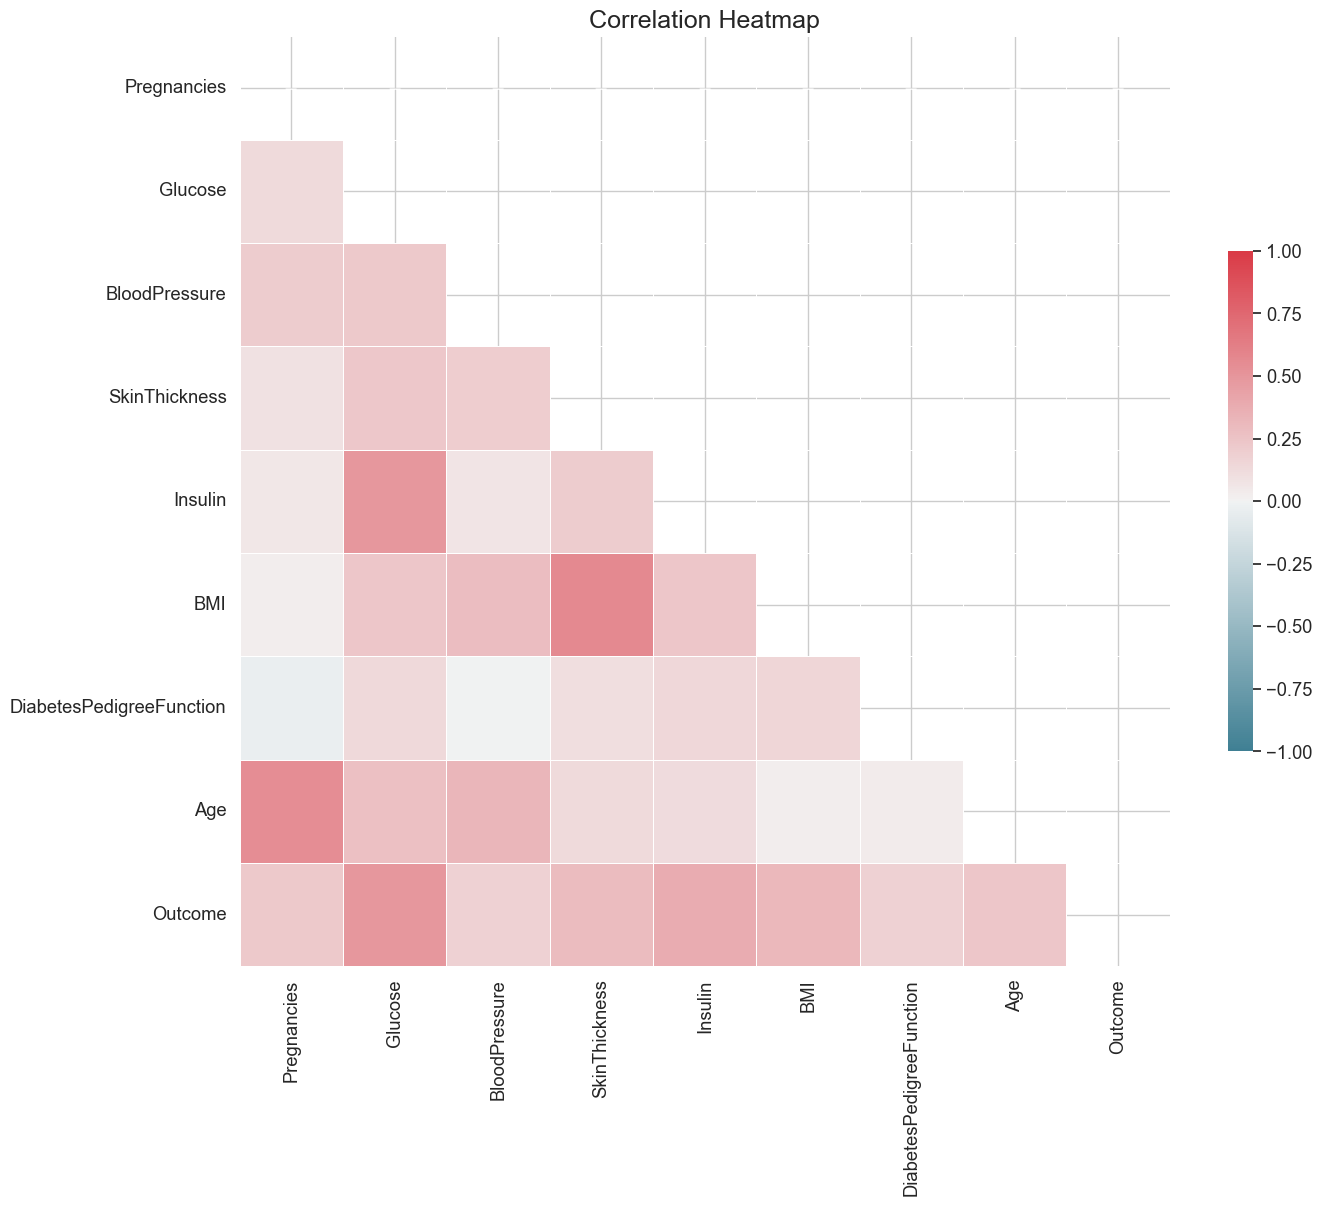

In [34]:
plot_correlation_heatmap(df)

### Feature Engineering

In [35]:
if CFG.use_pregnancy_category:
    df['PregnancyCategory'] = df['Pregnancies'].apply(lambda x: 'None' if x == 0 else 'Few' if x <= 2 else 'Several' if x <= 5 else 'Many')

if CFG.use_age_group:
    df['AgeGroup'] = df['Age'].apply(lambda age: '20-29' if age < 30 else '30-39' if age < 40 else '40-49' if age < 50 else '50+')

if CFG.use_blood_pressure_category:
    df['BloodPressure_Category'] = pd.cut(df['BloodPressure'], bins=[-1, 80, 90, float('inf')], labels=['Normal', 'Elevated', 'Hypertensive'])

if CFG.use_glucose_category:
    df['GlucoseCategory'] = df['Glucose'].apply(lambda x: 'Normal' if x < 140 else 'Prediabetic' if x < 200 else 'Diabetic')

if CFG.use_bmi_category:
    df['BMI_Category'] = pd.cut(df['BMI'], bins=[-1, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

if CFG.use_age_bmi:
    df['Age_BMI'] = df['Age'] * df['BMI']

if CFG.use_age_glucose:
    df['Age_Glucose'] = df['Age'] * df['Glucose']

if CFG.use_pregnancies_glucose:
    df['Pregnancies_Glucose'] = df['Pregnancies'] * df['Glucose']

if CFG.use_bmi_diabetes_pedigree_function:
    df['BMI_DiabetesPedigreeFunction'] = df['BMI'] * df['DiabetesPedigreeFunction']

if CFG.use_triceps_skin_fold_indicator:
    df['Triceps_Skin_Fold_Indicator'] = df['SkinThickness'].apply(lambda x: 1 if 20 <= x <= 30 else 0)

if CFG.use_insulin_resistance_index:
    df['Insulin_Resistance_Index'] = df['Insulin'] * df['Glucose'] / df['BMI']

if CFG.use_glucose_insulin_resistance_interaction:
    df['Glucose_InsulinResistance_Interaction'] = df['Glucose'] * df['Insulin_Resistance_Index']

if CFG.use_insulin_sensitivity:
    df['Insulin_Sensitivity'] = df['Glucose'] / (df['Insulin'] * df['BMI'])

if CFG.use_pregnancies_age_interaction:
    df['Pregnancies_Age_Interaction'] = df['Pregnancies'] * df['Age']

if CFG.use_pregnancies_blood_pressure_interaction:
    df['Pregnancies_BloodPressure_Interaction'] = df['Pregnancies'] * df['BloodPressure']

if CFG.use_insulin_diabetes_pedigree_interaction:
    df['Insulin_DiabetesPedigree_Interaction'] = df['Insulin'] * df['DiabetesPedigreeFunction']

if CFG.use_bmi_glucose_interaction:
    df['BMI_Glucose_Interaction'] = df['BMI'] * df['Glucose']

if CFG.use_age_blood_pressure_interaction:
    df['Age_BloodPressure_Interaction'] = df['Age'] * df['BloodPressure']

if CFG.use_insulin_sensitivity_insulin_interaction:
    df['Insulin_Sensitivity_Insulin_Interaction'] = df['Insulin_Sensitivity'] * df['Insulin']

if CFG.use_age_triceps_skin_fold_interaction:
    df['Age_Triceps_Skin_Fold_Interaction'] = df['Age'] * df['Triceps_Skin_Fold_Indicator']

if CFG.use_bmi_blood_pressure_interaction:
    df['BMI_BloodPressure_Interaction'] = df['BMI'] * df['BloodPressure']

if CFG.use_pregnancy_category_triceps_skin_fold_interaction:
    if 'PregnancyCategory' in df.columns and 'Triceps_Skin_Fold_Indicator' in df.columns:
        df['PregnancyCategory_Triceps_Skin_Fold_Interaction'] = df['PregnancyCategory'].astype(str) + '_' + df['Triceps_Skin_Fold_Indicator'].astype(str)

if CFG.use_insulin_age_interaction:
    df['Insulin_Age_Interaction'] = df['Insulin'] * df['Age']

if CFG.use_glucose_category_bmi_interaction:
    if 'GlucoseCategory' in df.columns and 'BMI_Category' in df.columns:
        df['GlucoseCategory_BMI_Interaction'] = df['GlucoseCategory'].astype(str) + '_' + df['BMI_Category'].astype(str)

if CFG.use_insulin_sensitivity_age_interaction:
    df['Insulin_Sensitivity_Age_Interaction'] = df['Insulin_Sensitivity'] * df['Age']

if CFG.use_age_diabetes_pedigree_interaction:
    df['Age_DiabetesPedigree_Interaction'] = df['Age'] * df['DiabetesPedigreeFunction']

if CFG.use_pregnancy_category_insulin_interaction:
    if 'PregnancyCategory' in df.columns:
        df['PregnancyCategory_Insulin_Interaction'] = df['PregnancyCategory'].astype(str) + '_' + df['Insulin'].astype(str)

if CFG.use_bmi_insulin_resistance_index_interaction:
    df['BMI_InsulinResistanceIndex_Interaction'] = df['BMI'] * df['Insulin_Resistance_Index']

if CFG.use_age_group_blood_pressure_category_interaction:
    if 'AgeGroup' in df.columns and 'BloodPressure_Category' in df.columns:
        df['AgeGroup_BloodPressure_Category_Interaction'] = df['AgeGroup'].astype(str) + '_' + df['BloodPressure_Category'].astype(str)

if CFG.use_glucose_triceps_skin_fold_interaction:
    df['Glucose_Triceps_Skin_Fold_Interaction'] = df['Glucose'] * df['Triceps_Skin_Fold_Indicator']

if CFG.use_pregnancy_category_bmi_interaction:
    if 'PregnancyCategory' in df.columns and 'BMI_Category' in df.columns:
        df['PregnancyCategory_BMI_Interaction'] = df['PregnancyCategory'].astype(str) + '_' + df['BMI_Category'].astype(str)

if CFG.use_bmi_insulin_sensitivity_interaction:
    df['BMI_Insulin_Sensitivity_Interaction'] = df['BMI'] * df['Insulin_Sensitivity']

if CFG.use_insulin_blood_pressure_interaction:
    df['Insulin_BloodPressure_Interaction'] = df['Insulin'] * df['BloodPressure']

if CFG.use_bmi_age_group_interaction:
    if 'BMI_Category' in df.columns and 'AgeGroup' in df.columns:
        df['BMI_AgeGroup_Interaction'] = df['BMI_Category'].astype(str) + '_' + df['AgeGroup'].astype(str)

if CFG.use_pregnancy_category_age_interaction:
    if 'PregnancyCategory' in df.columns and 'AgeGroup' in df.columns:
        df['PregnancyCategory_Age_Interaction'] = df['PregnancyCategory'].astype(str) + '_' + df['AgeGroup'].astype(str)

### Encoding İşlemleri 

In [36]:
categorical_cols, numeric_cols, cardinal_categoricals, numeric_but_categorical = analyze_columns(df)

{'Observations': 768, 'Variables': 44, 'Categorical Columns': ['PregnancyCategory', 'AgeGroup', 'BloodPressure_Category', 'GlucoseCategory', 'BMI_Category', 'PregnancyCategory_Triceps_Skin_Fold_Interaction', 'GlucoseCategory_BMI_Interaction', 'PregnancyCategory_Insulin_Interaction', 'AgeGroup_BloodPressure_Category_Interaction', 'PregnancyCategory_BMI_Interaction', 'BMI_AgeGroup_Interaction', 'PregnancyCategory_Age_Interaction'], 'Numerical Columns': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_BMI', 'Age_Glucose', 'Pregnancies_Glucose', 'BMI_DiabetesPedigreeFunction', 'Triceps_Skin_Fold_Indicator', 'Insulin_Resistance_Index', 'Glucose_InsulinResistance_Interaction', 'Insulin_Sensitivity', 'Pregnancies_Age_Interaction', 'Pregnancies_BloodPressure_Interaction', 'Insulin_DiabetesPedigree_Interaction', 'BMI_Glucose_Interaction', 'Age_BloodPressure_Interaction', 'Insulin_Sensitivity_Insulin_Interaction', '

In [37]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Her kategorik sütunu Label Encoding ile dönüştürme
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # LabelEncoder'ı saklıyoruz ki gerekirse dönüştürmeleri geri alabiliriz

# Dönüştürülmüş veri çerçevesini görüntüleme
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome  PregnancyCategory  AgeGroup  BloodPressure_Category  GlucoseCategory  BMI_Category  Age_BMI  Age_Glucose  Pregnancies_Glucose  BMI_DiabetesPedigreeFunction  Triceps_Skin_Fold_Indicator  Insulin_Resistance_Index  Glucose_InsulinResistance_Interaction  Insulin_Sensitivity  Pregnancies_Age_Interaction  Pregnancies_BloodPressure_Interaction  Insulin_DiabetesPedigree_Interaction  BMI_Glucose_Interaction  Age_BloodPressure_Interaction  Insulin_Sensitivity_Insulin_Interaction  Age_Triceps_Skin_Fold_Interaction  BMI_BloodPressure_Interaction  PregnancyCategory_Triceps_Skin_Fold_Interaction  Insulin_Age_Interaction  GlucoseCategory_BMI_Interaction  Insulin_Sensitivity_Age_Interaction  Age_DiabetesPedigree_Interaction  PregnancyCategory_Insulin_Interaction  BMI_InsulinResistanceIndex_Interaction  AgeGroup_BloodPressure_Category_Interaction  Glucose_Triceps_Skin_Fold_Interaction  Pregnan

### Standartization 

In [38]:

# Hedef sütunu hariç tüm sütunları seçelim
features = df.drop(columns=[CFG.target])

# MinMaxScaler'ı oluşturup uygulayalım
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Ölçeklendirilmiş özellikleri bir DataFrame'e dönüştürelim
scaled_features_df = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)

# Hedef sütunu geri ekleyelim
df = pd.concat([scaled_features_df, df[CFG.target]], axis=1)

# Sonuçları kontrol edelim
print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age  PregnancyCategory  AgeGroup  BloodPressure_Category  GlucoseCategory  BMI_Category   Age_BMI  Age_Glucose  Pregnancies_Glucose  BMI_DiabetesPedigreeFunction  Triceps_Skin_Fold_Indicator  Insulin_Resistance_Index  Glucose_InsulinResistance_Interaction  Insulin_Sensitivity  Pregnancies_Age_Interaction  Pregnancies_BloodPressure_Interaction  Insulin_DiabetesPedigree_Interaction  BMI_Glucose_Interaction  Age_BloodPressure_Interaction  Insulin_Sensitivity_Insulin_Interaction  Age_Triceps_Skin_Fold_Interaction  BMI_BloodPressure_Interaction  PregnancyCategory_Triceps_Skin_Fold_Interaction  Insulin_Age_Interaction  GlucoseCategory_BMI_Interaction  Insulin_Sensitivity_Age_Interaction  Age_DiabetesPedigree_Interaction  PregnancyCategory_Insulin_Interaction  BMI_InsulinResistanceIndex_Interaction  AgeGroup_BloodPressure_Category_Interaction  Glucose_Triceps_Skin_Fold_Interaction  Pregn

<Axes: >

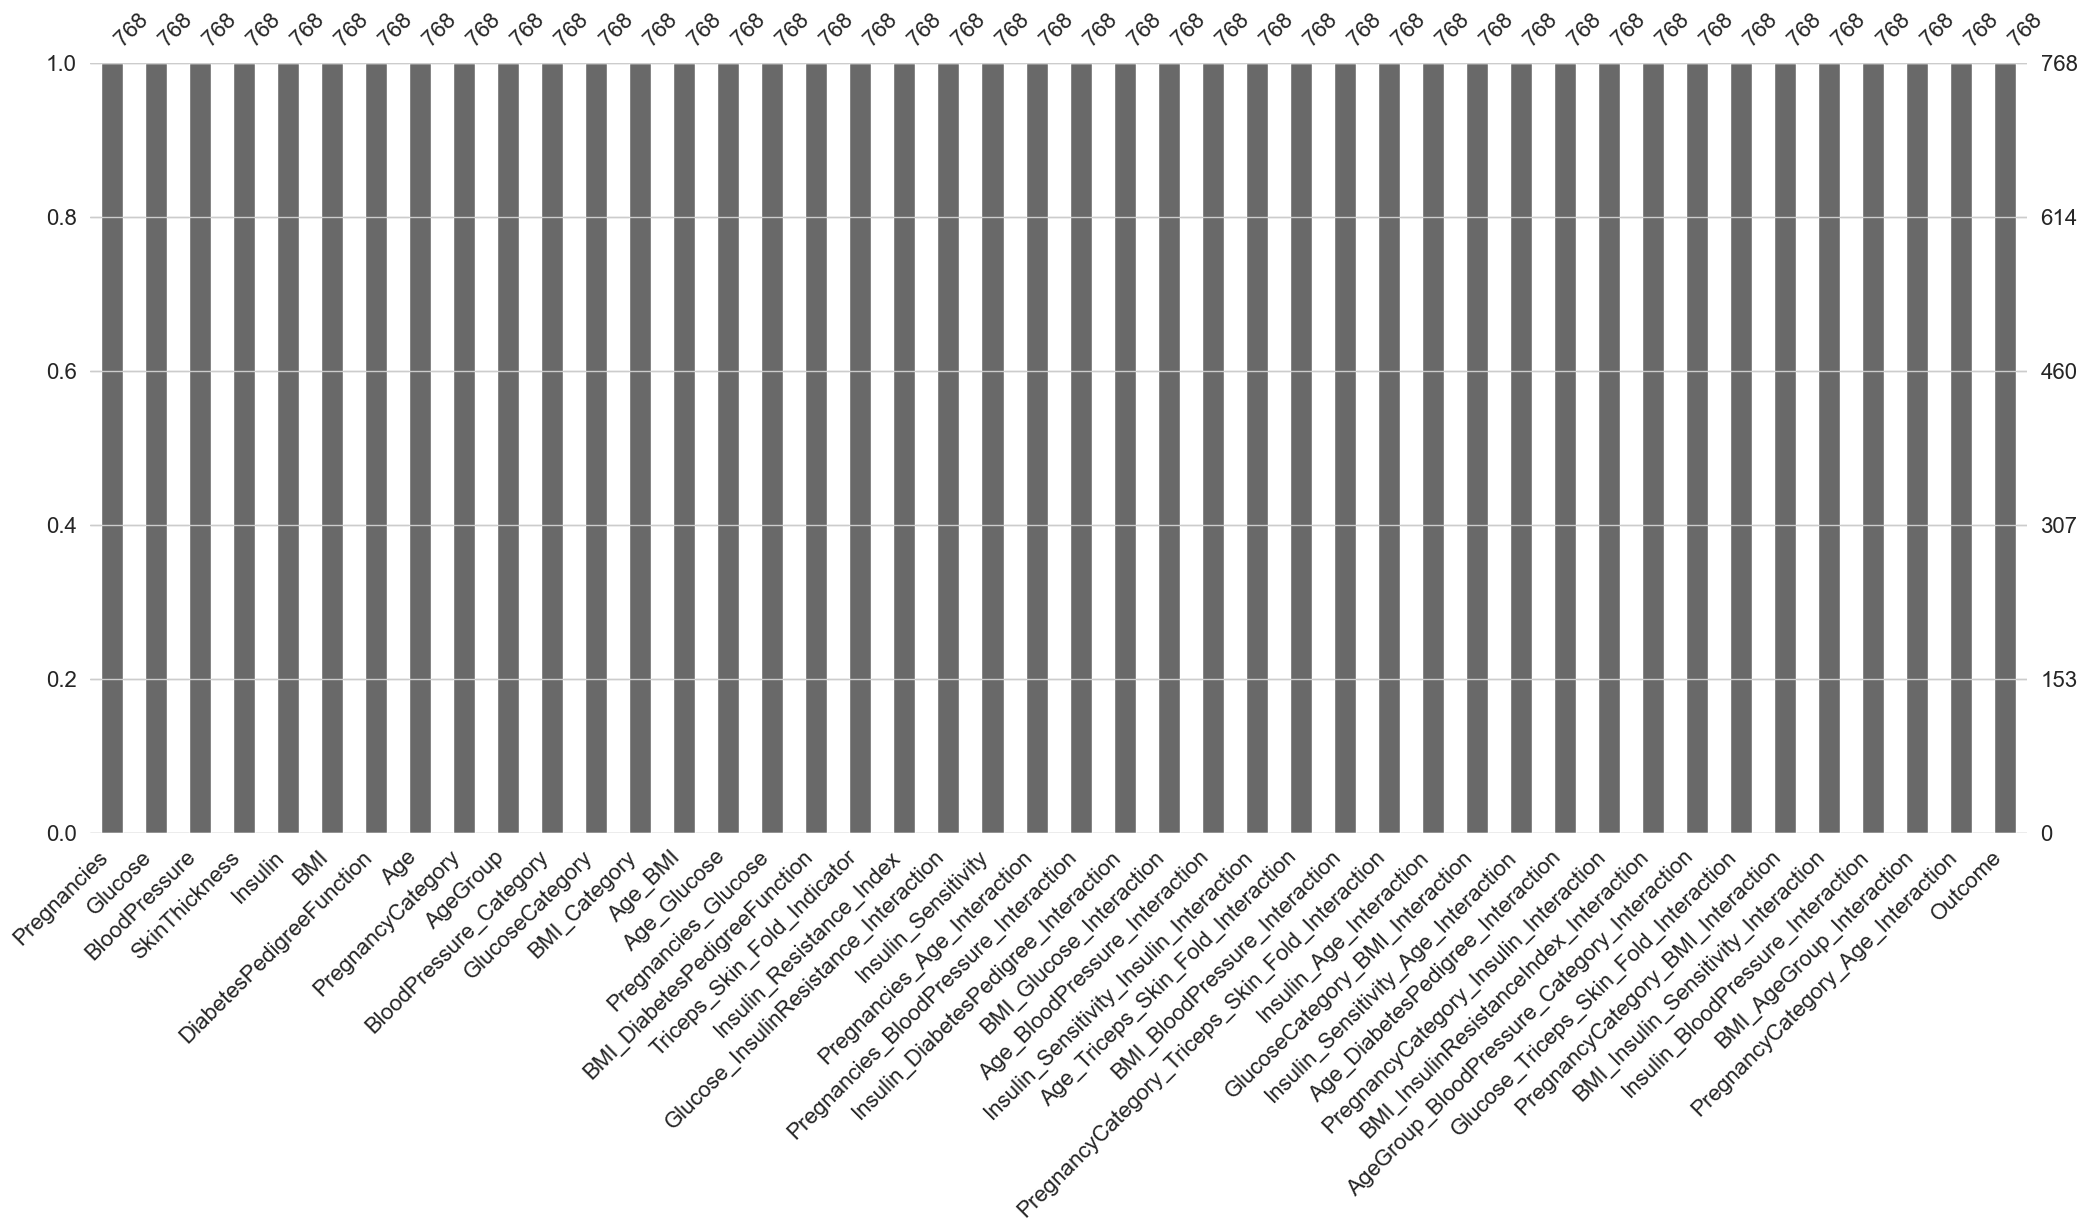

In [39]:
msno.bar(df)

### ML Part 

In [40]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
def evaluate_model_performance(df, target_col='Outcome', remove_features=None):
    # Target ve feature'ları ayır
    X = df.drop(columns=[target_col])
    y = df[target_col]

    if remove_features:
        cols_to_remove = [col for col in X.columns if any(feature in col for feature in remove_features)]
        X = X.drop(columns=cols_to_remove)
    
    # Veriyi train ve test olarak ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
    
    # CatBoost modelini eğit ve skoru hesapla
    cb = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
    cb.fit(X_train, y_train)
    y_pred = cb.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    return score

In [43]:
"""def get_performance_decreasing_features(df, interaction_keywords, target_col):
    baseline_score = evaluate_model_performance(df, target_col=target_col)
    
    performance_changes = {}
    
    for keyword in interaction_keywords:
        score_after_removal = evaluate_model_performance(df, target_col=target_col, remove_features=[keyword])
        performance_change = baseline_score - score_after_removal
        performance_changes[keyword] = performance_change
    
    performance_decreasing_features = [keyword for keyword, change in performance_changes.items() if change > 0]
    
    return baseline_score, performance_changes, performance_decreasing_features"""

'def get_performance_decreasing_features(df, interaction_keywords, target_col):\n    baseline_score = evaluate_model_performance(df, target_col=target_col)\n    \n    performance_changes = {}\n    \n    for keyword in interaction_keywords:\n        score_after_removal = evaluate_model_performance(df, target_col=target_col, remove_features=[keyword])\n        performance_change = baseline_score - score_after_removal\n        performance_changes[keyword] = performance_change\n    \n    performance_decreasing_features = [keyword for keyword, change in performance_changes.items() if change > 0]\n    \n    return baseline_score, performance_changes, performance_decreasing_features'

In [44]:
"""interaction_keywords = ['PregnancyCategory', 'AgeGroup', 'BloodPressure_Category', 'GlucoseCategory', 'BMI_Category', 'Age_BMI', 
                        'Age_Glucose', 'Pregnancies_Glucose', 'BMI_DiabetesPedigreeFunction', 'Triceps_Skin_Fold_Indicator', 
                        'Insulin_Resistance_Index', 'Glucose_InsulinResistance_Interaction', 'Insulin_Sensitivity', 
                        'Pregnancies_Age_Interaction', 'Pregnancies_BloodPressure_Interaction', 'Insulin_DiabetesPedigree_Interaction', 
                        'BMI_Glucose_Interaction', 'Age_BloodPressure_Interaction', 'Insulin_Sensitivity_Insulin_Interaction', 
                        'Age_Triceps_Skin_Fold_Interaction', 'BMI_BloodPressure_Interaction', 'PregnancyCategory_Triceps_Skin_Fold_Interaction', 
                        'Insulin_Age_Interaction', 'GlucoseCategory_BMI_Interaction', 'Insulin_Sensitivity_Age_Interaction', 
                        'Age_DiabetesPedigree_Interaction', 'PregnancyCategory_Insulin_Interaction', 'BMI_InsulinResistanceIndex_Interaction', 
                        'AgeGroup_BloodPressure_Category_Interaction', 'Glucose_Triceps_Skin_Fold_Interaction', 'PregnancyCategory_BMI_Interaction', 
                        'BMI_Insulin_Sensitivity_Interaction', 'Insulin_BloodPressure_Interaction', 'BMI_AgeGroup_Interaction', 
                        'PregnancyCategory_Age_Interaction']

baseline_performance, performance_changes, performance_decreasing_features = get_performance_decreasing_features(df, interaction_keywords, target_col='Outcome')"""

"interaction_keywords = ['PregnancyCategory', 'AgeGroup', 'BloodPressure_Category', 'GlucoseCategory', 'BMI_Category', 'Age_BMI', \n                        'Age_Glucose', 'Pregnancies_Glucose', 'BMI_DiabetesPedigreeFunction', 'Triceps_Skin_Fold_Indicator', \n                        'Insulin_Resistance_Index', 'Glucose_InsulinResistance_Interaction', 'Insulin_Sensitivity', \n                        'Pregnancies_Age_Interaction', 'Pregnancies_BloodPressure_Interaction', 'Insulin_DiabetesPedigree_Interaction', \n                        'BMI_Glucose_Interaction', 'Age_BloodPressure_Interaction', 'Insulin_Sensitivity_Insulin_Interaction', \n                        'Age_Triceps_Skin_Fold_Interaction', 'BMI_BloodPressure_Interaction', 'PregnancyCategory_Triceps_Skin_Fold_Interaction', \n                        'Insulin_Age_Interaction', 'GlucoseCategory_BMI_Interaction', 'Insulin_Sensitivity_Age_Interaction', \n                        'Age_DiabetesPedigree_Interaction', 'PregnancyCategory_Ins

In [45]:
""" # Performansı düşüren feature'ları df'ten çıkar ve modeli tekrar değerlendir
new_score = evaluate_model_performance(df, target_col='Outcome', remove_features=performance_decreasing_features)

print(f"Baseline performance: {baseline_performance}")
print(f"New performance after removing features: {new_score}")
print(f"Features removed: {performance_decreasing_features}") """

' # Performansı düşüren feature\'ları df\'ten çıkar ve modeli tekrar değerlendir\nnew_score = evaluate_model_performance(df, target_col=\'Outcome\', remove_features=performance_decreasing_features)\n\nprint(f"Baseline performance: {baseline_performance}")\nprint(f"New performance after removing features: {new_score}")\nprint(f"Features removed: {performance_decreasing_features}") '

RF: 0.887441 (0.034391)

Top 20 features for RF:
1. Feature BMI_InsulinResistanceIndex_Interaction: 0.13461604201599228
2. Feature Insulin: 0.11866893654690552
3. Feature Insulin_BloodPressure_Interaction: 0.08293163612513356
4. Feature Insulin_Resistance_Index: 0.049327675708433306
5. Feature SkinThickness: 0.042926545680803854
6. Feature BMI_Glucose_Interaction: 0.040575614012794955
7. Feature Insulin_Age_Interaction: 0.03726784126132012
8. Feature Age_Glucose: 0.03372474847987949
9. Feature Insulin_Sensitivity: 0.03344400359037077
10. Feature Insulin_Sensitivity_Age_Interaction: 0.032539369273480015
11. Feature Glucose_InsulinResistance_Interaction: 0.029635065163591146
12. Feature BMI_Insulin_Sensitivity_Interaction: 0.027644472950390676
13. Feature Glucose: 0.024522772334760648
14. Feature Age_BMI: 0.0239887113657541
15. Feature PregnancyCategory_Insulin_Interaction: 0.022283202436462295
16. Feature Age: 0.02089395799559028
17. Feature Insulin_DiabetesPedigree_Interaction: 0.01951

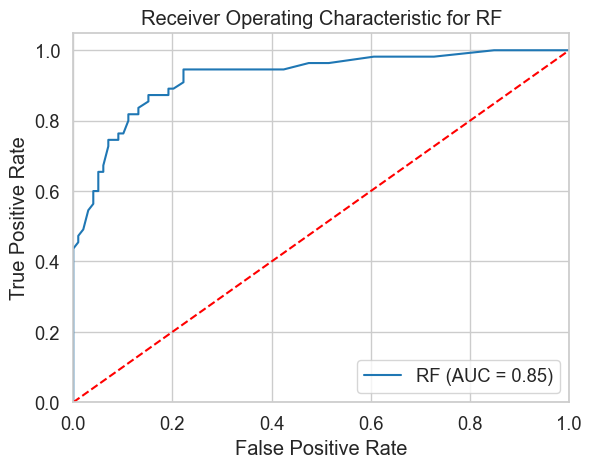

GBM Test Accuracy: 0.8766
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        99
         1.0       0.83      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



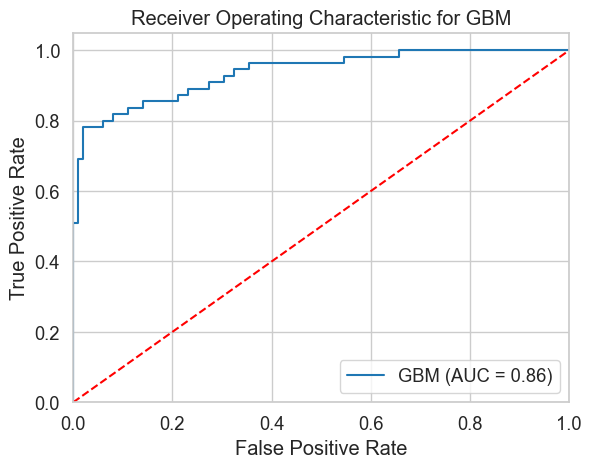

XGBM Test Accuracy: 0.8571
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        99
         1.0       0.79      0.82      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



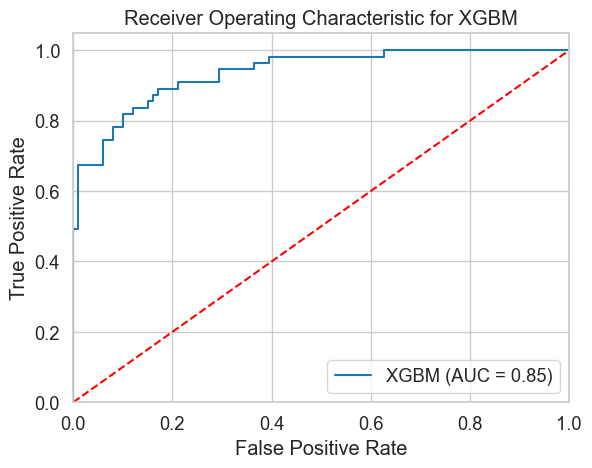

LightGBM Test Accuracy: 0.8701
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        99
         1.0       0.83      0.80      0.81        55

    accuracy                           0.87       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154



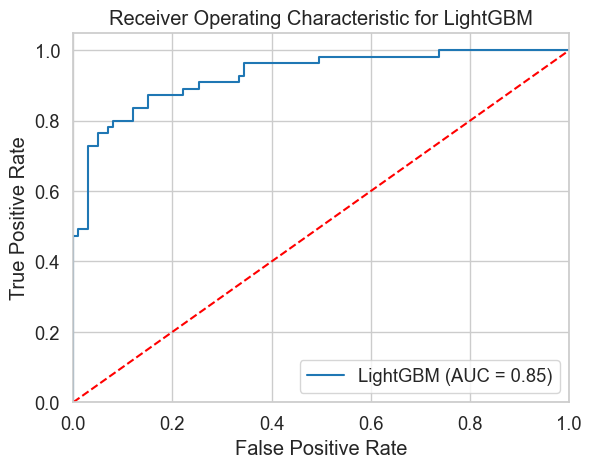

Logistic Regression Test Accuracy: 0.7857
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        99
         1.0       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



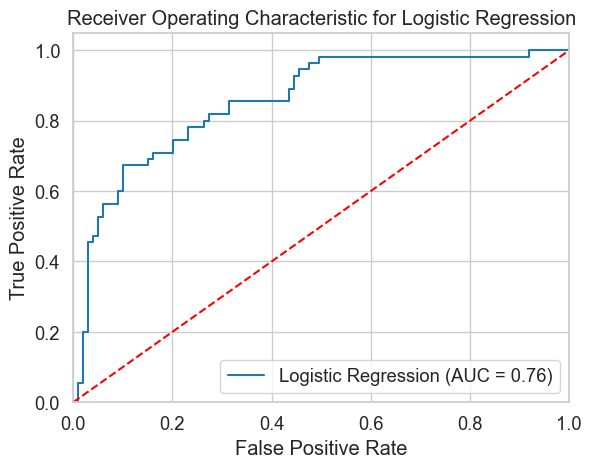

SVM Test Accuracy: 0.7792
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        99
         1.0       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



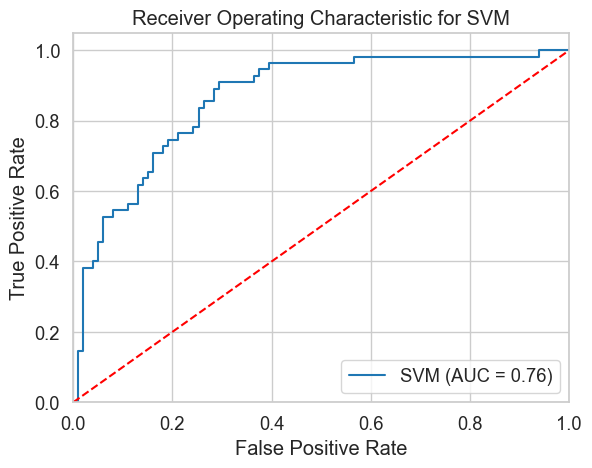

KNN Test Accuracy: 0.7662
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        99
         1.0       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Decision Tree Test Accuracy: 0.7987
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84        99
         1.0       0.70      0.76      0.73        55

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



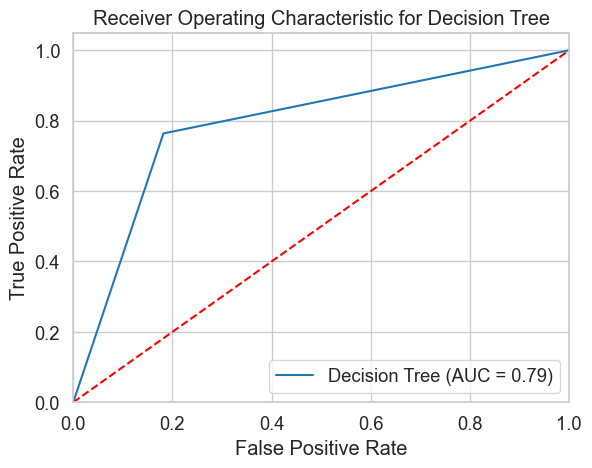

AdaBoost Test Accuracy: 0.8766
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        99
         1.0       0.83      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



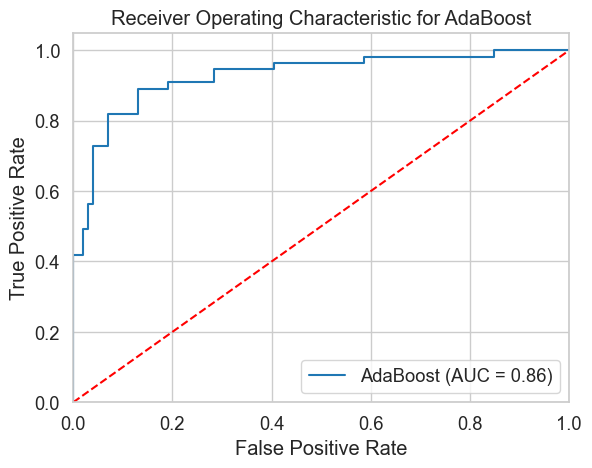

Catboost Test Accuracy: 0.8766
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        99
         1.0       0.83      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



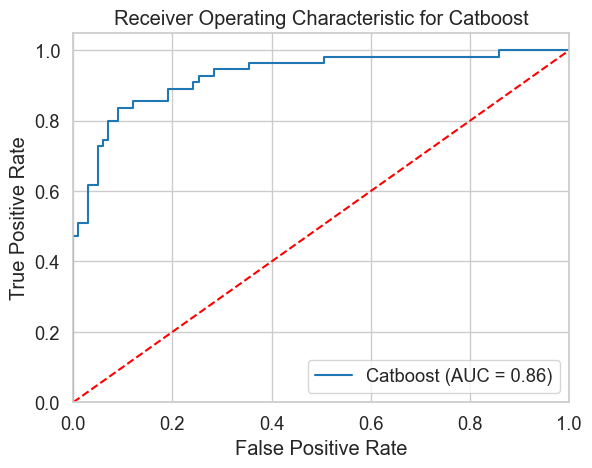

In [46]:
models = [
    ('RF', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGBM', XGBClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1)),
    ("Logistic Regression", LogisticRegression()),
    ('SVM', SVC(probability=True)),  # probability=True ekledim çünkü predict_proba kullanılıyor.
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ("Catboost", CatBoostClassifier(silent=True))
]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    # Fit model to get feature importances (for models that support it)
    if name in ['RF', 'GBM', 'XGBM', 'LightGBM', 'SVM', 'KNN', 'Decision Tree', 'AdaBoost', 'Logistic Regression', 'Catboost']:
        model.fit(X_train, y_train)
        # Get feature importances or coefficients
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            feature_importances = model.coef_[0]
        else:
            feature_importances = None
        
        if feature_importances is not None:
            # Sort feature importances in descending order
            if name in ['GBM', 'XGBM', 'LightGBM']:
                indices = np.argsort(feature_importances)[::-1]
            else:
                indices = np.argsort(-feature_importances)
            
            # Print the top 20 features
            feature_names = X_train.columns
            print(f"\nTop 20 features for {name}:")
            for i in range(min(20, len(feature_importances))):
                print(f"{i+1}. Feature {feature_names[indices[i]]}: {feature_importances[indices[i]]}")

# Evaluate the models on the test set
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy:.4f}")
    
    print(classification_report(y_test, y_pred))
    
    if name in ['RF', 'GBM', 'XGBM', 'LightGBM', 'SVM', 'Decision Tree', 'AdaBoost', 'Logistic Regression', 'Catboost']:
        logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {name}')
        plt.legend(loc="lower right")
        plt.savefig(f'{name}_ROC')
        plt.show()


In [47]:
train_accuracy_scores = []
test_accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models:
    # Fit the model on the train data
    model.fit(X_train, y_train)
    
    # Predict on the train data
    y_train_pred = model.predict(X_train)
    
    # Predict on the test data
    y_test_pred = model.predict(X_test)
    
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_test_pred)
    precision_scores.append(precision)
    
    # Calculate recall
    recall = recall_score(y_test, y_test_pred)
    recall_scores.append(recall)
    
    # Calculate F1-score
    f1 = f1_score(y_test, y_test_pred)
    f1_scores.append(f1)
    
    # Print the results
    print(f"\n{name} Model Metrics:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

# Optional: Convert results to a DataFrame for better readability
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Train Accuracy': train_accuracy_scores,
    'Test Accuracy': test_accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

print("\nOverall Metrics:")
print(metrics_df)


RF Model Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.8701
Precision: 0.8070
Recall: 0.8364
F1-score: 0.8214

GBM Model Metrics:
Train Accuracy: 0.9967
Test Accuracy: 0.8636
Precision: 0.8036
Recall: 0.8182
F1-score: 0.8108

XGBM Model Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.8571
Precision: 0.7895
Recall: 0.8182
F1-score: 0.8036

LightGBM Model Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.8701
Precision: 0.8302
Recall: 0.8000
F1-score: 0.8148

Logistic Regression Model Metrics:
Train Accuracy: 0.8176
Test Accuracy: 0.7857
Precision: 0.7037
Recall: 0.6909
F1-score: 0.6972

SVM Model Metrics:
Train Accuracy: 0.8469
Test Accuracy: 0.7792
Precision: 0.6842
Recall: 0.7091
F1-score: 0.6964

KNN Model Metrics:
Train Accuracy: 0.8420
Test Accuracy: 0.7662
Precision: 0.6727
Recall: 0.6727
F1-score: 0.6727

Decision Tree Model Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.8312
Precision: 0.7544
Recall: 0.7818
F1-score: 0.7679

AdaBoost Model Metrics:
Train Accuracy: 0.9463
T

## Voting Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Initialize classifiers
knn = KNeighborsClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
ab = AdaBoostClassifier()
lgb = LGBMClassifier(verbose=-1)
cb = CatBoostClassifier(verbose=False)

# Create a VotingClassifier
v_clf = VotingClassifier(estimators=[
    ('knn', knn), 
    ('xgb', xgb), 
    ('rf', rf), 
    ('dt', dt), 
    ('lgb', lgb), 
    ('ab', ab), 
    ('cb', cb)], 
    voting='hard')

# Fit the VotingClassifier
v_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('lgb', LGBMClassifier(verbose=-1)),
                             ('ab', AdaBoostClassifier()),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x00000212220BDED0>)])

In [49]:
y_pred = v_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8896
Precision: 0.8519
Recall: 0.8364
F1 Score: 0.8440


### Hyperparameter Optimization

In [50]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = XGBClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
    }
    model = RandomForestClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_dt(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
    }
    model = DecisionTreeClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_ab(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = AdaBoostClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = LGBMClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_cb(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = CatBoostClassifier(**param, verbose=0)
    return cross_val_score(model, X_train, y_train, cv=5).mean()




In [ ]:
# Objective functions with extended parameter ranges
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = XGBClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
    }
    model = RandomForestClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_dt(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
    }
    model = DecisionTreeClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_ab(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = AdaBoostClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = LGBMClassifier(**param)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

def objective_cb(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 3, 16),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    }
    model = CatBoostClassifier(**param, verbose=0)
    return cross_val_score(model, X_train, y_train, cv=5).mean()

# Optimize each model
study_knn = optuna.create_study(direction='maximize', sampler=TPESampler())
study_knn.optimize(objective_knn, n_trials=50)

study_xgb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_xgb.optimize(objective_xgb, n_trials=50)

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler())
study_rf.optimize(objective_rf, n_trials=50)

study_dt = optuna.create_study(direction='maximize', sampler=TPESampler())
study_dt.optimize(objective_dt, n_trials=50)

study_ab = optuna.create_study(direction='maximize', sampler=TPESampler())
study_ab.optimize(objective_ab, n_trials=50)

study_lgb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_lgb.optimize(objective_lgb, n_trials=50)

study_cb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_cb.optimize(objective_cb, n_trials=50)

# Get the best parameters and scores for each classifier
best_params_and_scores = {
    'KNN': (study_knn.best_params, study_knn.best_value),
    'XGBoost': (study_xgb.best_params, study_xgb.best_value),
    'Random Forest': (study_rf.best_params, study_rf.best_value),
    'Decision Tree': (study_dt.best_params, study_dt.best_value),
    'AdaBoost': (study_ab.best_params, study_ab.best_value),
    'LightGBM': (study_lgb.best_params, study_lgb.best_value),
    'CatBoost': (study_cb.best_params, study_cb.best_value)
}

# Print the best parameters and highest accuracy for each classifier
for name, (params, score) in best_params_and_scores.items():
    print(f"{name} Classifier:")
    print(f"Best Params: {params}")
    print(f"Highest Cross-Validated Accuracy: {score:.4f}")
    print("-" * 30)



In [ ]:
"""KNN Classifier:
Best Params: {'n_neighbors': 5}
Highest Cross-Validated Accuracy: 0.8013
------------------------------
XGBoost Classifier:
Best Params: {'n_estimators': 406, 'max_depth': 4, 'learning_rate': 0.01327383672708655}
Highest Cross-Validated Accuracy: 0.9056
------------------------------
Random Forest Classifier:
Best Params: {'n_estimators': 480, 'max_depth': 11}
Highest Cross-Validated Accuracy: 0.8910
------------------------------
Decision Tree Classifier:
Best Params: {'max_depth': 5}
Highest Cross-Validated Accuracy: 0.8552
------------------------------
AdaBoost Classifier:
Best Params: {'n_estimators': 391, 'learning_rate': 0.09833509353394146}
Highest Cross-Validated Accuracy: 0.8811
------------------------------
LightGBM Classifier:
Best Params: {'n_estimators': 462, 'max_depth': 14, 'learning_rate': 0.04211170344259642}
Highest Cross-Validated Accuracy: 0.8974
------------------------------
CatBoost Classifier:
Best Params: {'iterations': 62, 'depth': 4, 'learning_rate': 0.08709284582824214}
Highest Cross-Validated Accuracy: 0.8910
------------------------------"""

In [53]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(n_estimators=406, max_depth=6, learning_rate=0.01327383672708655),
    'Random Forest': RandomForestClassifier(n_estimators=480, max_depth=14),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=391, learning_rate=0.09833509353394146),
    'LightGBM': LGBMClassifier(n_estimators=462, max_depth=14, learning_rate=0.04211170344259642,verbose=-1),
    'CatBoost': CatBoostClassifier(iterations=62, depth=4, learning_rate=0.08709284582824214, verbose=0)
}

# Modelleri eğit ve performanslarını değerlendir
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

# Sonuçları göster
for model_name, metrics in results.items():
    print(f"{model_name} Classifier:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print("-" * 30)

KNN Classifier:
Accuracy: 0.7662
F1 Score: 0.7662
Precision: 0.7662
Recall: 0.7662
------------------------------
XGBoost Classifier:
Accuracy: 0.8506
F1 Score: 0.8515
Precision: 0.8530
Recall: 0.8506
------------------------------
Random Forest Classifier:
Accuracy: 0.8831
F1 Score: 0.8836
Precision: 0.8843
Recall: 0.8831
------------------------------
Decision Tree Classifier:
Accuracy: 0.8571
F1 Score: 0.8586
Precision: 0.8627
Recall: 0.8571
------------------------------
AdaBoost Classifier:
Accuracy: 0.8701
F1 Score: 0.8711
Precision: 0.8732
Recall: 0.8701
------------------------------
LightGBM Classifier:
Accuracy: 0.8506
F1 Score: 0.8503
Precision: 0.8501
Recall: 0.8506
------------------------------
CatBoost Classifier:
Accuracy: 0.8571
F1 Score: 0.8582
Precision: 0.8604
Recall: 0.8571
------------------------------
